In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [7]:
df = pd.read_csv('Chicago_Crime_Detective.csv',low_memory=False, parse_dates=['Date'])
df.head(30)

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012
5,5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012
6,6,8950760,2012-12-31 20:10:00,STREET,False,False,423,4,48,2012
7,7,8951611,2012-12-31 20:00:00,STREET,False,False,231,2,40,2012
8,8,8951802,2012-12-31 19:00:00,STREET,True,False,1021,10,29,2012
9,9,8950706,2012-12-31 18:00:00,STREET,False,False,1215,12,24,2012


In [10]:
lst = list(df.Date.sort_values())
lst[len(lst)//2]

Timestamp('2006-05-21 12:30:00')

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Date', 'LocationDescription', 'Arrest', 'Domestic',
       'Beat', 'District', 'CommunityArea', 'Year'],
      dtype='object')

In [6]:
df.set_index('Unnamed: 0')

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
Unnamed: 0,,,,,,,,,
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012
...,...,...,...,...,...,...,...,...,...
191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001
191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001
191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001


In [29]:
df.describe()

,Unnamed: 0,ID,Beat,Year
count,191641.000000,1.916410e+05,191641.000000,191641.000000
mean,95820.000000,4.968629e+06,1258.810771,2006.134940
std,55322.135806,2.342997e+06,702.530465,3.520285
min,0.000000,1.310022e+06,111.000000,2001.000000
25%,47910.000000,2.832144e+06,722.000000,2003.000000
50%,95820.000000,4.762956e+06,1121.000000,2006.000000
75%,143730.000000,7.201878e+06,1733.000000,2009.000000
max,191640.000000,9.181151e+06,2535.000000,2012.000000


In [25]:
df.Date.sort_values()

191640   2001-01-01 00:01:00
191637   2001-01-01 00:01:00
191639   2001-01-01 00:01:00
191638   2001-01-01 00:01:00
191634   2001-01-01 00:05:00
                 ...        
4        2012-12-31 21:30:00
3        2012-12-31 22:00:00
2        2012-12-31 22:00:00
1        2012-12-31 22:00:00
0        2012-12-31 23:15:00
Name: Date, Length: 191641, dtype: datetime64[ns]

# Using DateTimeIndex

In [70]:
# Q1
date = list(df.sort_values('Date')['Date'])
date[len(date)//2]

Timestamp('2006-05-21 12:30:00')

In [24]:
L = list(pd.DatetimeIndex(df['Date']))
L[len(L)//2]

Timestamp('2006-05-21 12:30:00')

In [40]:
# Q2
df['Month'] = pd.DatetimeIndex(df['Date']).month
df

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,weekday,Weekday,Month
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,0,0,12
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,0,0,12
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,0,0,12
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,0,0,12
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001,0,0,1
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,0,0,1
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,0,0,1
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,0,0,1


In [76]:
df.Month.value_counts()

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
Name: Month, dtype: int64

In [33]:
# Q3
df['weekday'] = df['Date'].dt.dayofweek
df

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,weekday,Weekday
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,0,0
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,0,0
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,0,0
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,0,0
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001,0,0
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,0,0
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,0,0
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,0,0


In [36]:
df.drop('weekday', axis=1)

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Weekday
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,0
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,0
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,0
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,0
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,0
...,...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001,0
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,0
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,0
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,0


In [32]:
df['Weekday']=pd.DatetimeIndex(df['Date']).dayofweek
df

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,weekday,Weekday
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,0,0
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,0,0
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,0,0
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,0,0
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001,0,0
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,0,0
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,0,0
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,0,0


In [37]:
# Q3
df.Weekday.value_counts()

4    29284
2    27416
0    27397
3    27319
5    27118
1    26791
6    26316
Name: Weekday, dtype: int64

In [41]:
# Q4
df[df.Arrest==True].Month.value_counts()

1     1435
12    1397
10    1342
8     1329
7     1324
3     1298
11    1256
4     1252
9     1248
2     1238
6     1230
5     1187
Name: Month, dtype: int64

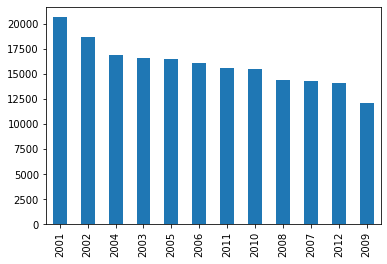

In [42]:
# Q5
df.Year.value_counts().plot(kind='bar')

In [88]:
df.Year.value_counts()

2001    20669
2002    18753
2004    16862
2003    16657
2005    16484
2006    16098
2011    15637
2010    15497
2008    14445
2007    14280
2012    14092
2009    12167
Name: Year, dtype: int64

In [43]:
# Q6
df[df.Arrest==True].Year.value_counts()

2001    2152
2002    2115
2003    1798
2004    1693
2005    1528
2006    1302
2007    1212
2008    1020
2009     840
2010     701
2011     625
2012     550
Name: Year, dtype: int64

In [106]:
# Q8
round(1212/14280, ndigits=2)

0.08

In [45]:
df[df.Arrest==True].Year.value_counts()

2001    2152
2002    2115
2003    1798
2004    1693
2005    1528
2006    1302
2007    1212
2008    1020
2009     840
2010     701
2011     625
2012     550
Name: Year, dtype: int64

In [103]:
df[df.Arrest==False].Year.value_counts()

2001    18517
2002    16638
2004    15169
2011    15012
2005    14956
2003    14859
2010    14796
2006    14796
2012    13542
2008    13425
2007    13068
2009    11327
Name: Year, dtype: int64

In [51]:
# Q7
round(2152/(18517+2152), ndigits=2)

0.1

In [114]:
# Q9
df.LocationDescription.value_counts().head(6)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [52]:
# Q10 
156564+14852+2308+2111+1675

177510

In [118]:
# Q11
df[df.LocationDescription == 'GAS STATION'].weekday.value_counts()

5    338
6    336
4    332
3    282
0    280
2    273
1    270
Name: weekday, dtype: int64

In [113]:
# Q10
df.LocationDescription.value_counts().head(6).sum()-4573

177510

In [111]:
df['LocationDescription' == ['STREET','PARKING LOT/GARAGE(NON.RESID.)','ALLEY', 'GAS STATION','DRIVEWAY - RESIDENTIAL']]

KeyError: False